<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Cats_vs_Dogs_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Preparing Datasets

In [1]:
import os

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!mkdir -p ~/.kaggle

In [19]:
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:21<00:00, 37.7MB/s]
100% 812M/812M [00:21<00:00, 40.1MB/s]


In [21]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [22]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [23]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-05 08:10:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-05 08:10:48 (116 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [24]:
from helper_functions import plot_loss_curves,walk_through_dir

In [25]:
import tensorflow as tf
import pandas as pd

In [26]:
walk_through_dir("/content/train")

There are 0 directories and 25000 images in '/content/train'.


In [27]:
IMAGE_SHAPE = (128,128)
IMAGE_CHANNEL = 3

## Preparing Training Dataset

In [28]:
filenames = os.listdir('/content/train')

In [29]:
label = []
for i in filenames:
  category_name = i.split('.')
  if category_name[0] == 'dog':
    label.append(0)
  else:
    label.append(1)
dataset = pd.DataFrame({
    "file":filenames,
    "label":label,
})

In [30]:
dataset

,file,label
0,cat.2142.jpg,1
1,dog.10854.jpg,0
2,cat.5249.jpg,1
3,dog.2757.jpg,0
4,cat.518.jpg,1
...,...,...
24995,dog.4635.jpg,0
24996,dog.7810.jpg,0
24997,cat.2909.jpg,1
24998,cat.5480.jpg,1


In [31]:
import random
import matplotlib.pyplot as plt

In [32]:
def load_and_prep_image(filename,img_shape=224):
      img = tf.io.read_file(filename)
      img = tf.image.decode_image(img)
      img = tf.image.resize(img,[img_shape,img_shape])
      img = img/255.
      return img

In [33]:
def plot_random_image():
  filename = random.choice(filenames)
  print(filename)
  image = '/content/train/'+filename
  image = load_and_prep_image(image)
  plt.imshow(image)
  plt.axis('off')

cat.5714.jpg


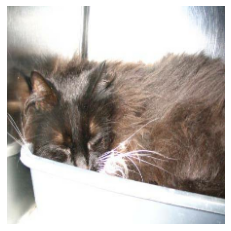

In [34]:
plot_random_image()

In [35]:
dataset

,file,label
0,cat.2142.jpg,1
1,dog.10854.jpg,0
2,cat.5249.jpg,1
3,dog.2757.jpg,0
4,cat.518.jpg,1
...,...,...
24995,dog.4635.jpg,0
24996,dog.7810.jpg,0
24997,cat.2909.jpg,1
24998,cat.5480.jpg,1


In [36]:
dataset = dataset.replace({0:'Dog',1:'Cat'})

In [57]:
from sklearn.model_selection import train_test_split
train_dataset,validate_dataset = train_test_split(dataset,test_size = 0.2)

In [58]:
train_dataset.reset_index(drop = True,inplace = True)

In [59]:
validate_dataset.reset_index(inplace = True,drop = True)

In [60]:
validate_dataset

,file,label
0,cat.9072.jpg,Cat
1,cat.4142.jpg,Cat
2,dog.8976.jpg,Dog
3,cat.7955.jpg,Cat
4,dog.10951.jpg,Dog
...,...,...
4995,dog.679.jpg,Dog
4996,dog.3456.jpg,Dog
4997,cat.4196.jpg,Cat
4998,dog.5587.jpg,Dog


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale = 1./255)
validation_data_generator = ImageDataGenerator(rescale = 1./255)
train_dir = 'train/'
train_data = train_data_generator.flow_from_dataframe(train_dataset,train_dir,x_col='file',
    y_col='label',batch_size = 32,seed = 42,class_model = 'categorical',target_size = (224,224))

Found 20000 validated image filenames belonging to 2 classes.


In [61]:
validation_data = validation_data_generator.flow_from_dataframe(validate_dataset,train_dir,x_col='file',
    y_col='label',batch_size = 32,seed = 42,class_model = 'categorical',target_size = (224,224))

Found 5000 validated image filenames belonging to 2 classes.


## Model 0 : Baseline Model

In [63]:
from tensorflow.keras import layers

In [80]:
model_0 = tf.keras.Sequential([
    layers.Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
    layers.Conv2D(10,3,activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(2),
    layers.Dropout(0.2),
    layers.Conv2D(10,3,activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(2),
    layers.Dropout(0.2),
    layers.Conv2D(10,3,activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(2),
    layers.Dropout(0.2),
    layers.Conv2D(10,3,activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(2),
    layers.Dropout(0.2),layers.Conv2D(10,3,activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D(2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1,activation = "sigmoid",name = "output_layer")
])
model_0.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [81]:
model_0.fit(train_data,epochs = 5,steps_per_epoch = len(train_data)//32,validation_data = validation_data,validation_steps = len(validation_data)//32)

Epoch 1/5
19/19 [==============================] - 23s 169ms/step - loss: 1.0799 - accuracy: 0.5000 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 2/5
19/19 [==============================] - 3s 152ms/step - loss: 0.9731 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 3/5
19/19 [==============================] - 4s 230ms/step - loss: 0.9251 - accuracy: 0.5000 - val_loss: 0.7079 - val_accuracy: 0.5000
Epoch 4/5
19/19 [==============================] - 3s 153ms/step - loss: 0.8594 - accuracy: 0.5000 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 5/5
19/19 [==============================] - 3s 147ms/step - loss: 0.8405 - accuracy: 0.5000 - val_loss: 0.7149 - val_accuracy: 0.5000
